In [31]:
import pandas as pd
import numpy as np

import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer

In [59]:
GoT_df = pd.read_csv('C:\\data files\\All Clean.csv')

In [95]:
pd.set_option('display.max_rows', None)

In [60]:
GoT_df.head()

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status
0,9,harpersbazaarsg,harpersbazaarsg,tweet,fri apr 01 07:00:22 +0000 2016,715795927672496129,this is just insane for a tv series: https://t...,"['got', 'gameofthrones']",False
1,10,shagil_,firstpost,mentions,fri apr 01 07:02:47 +0000 2016,715796535875932160,rt @firstpost: 'heavy bubbles is secret of my ...,['gameofthrones'],True
2,15,gameofthrones1v,gameofthrones1v,tweet,fri apr 01 07:16:24 +0000 2016,715799962588692483,#gameofthrones game of thrones: season 3 (#dvd...,"['gameofthrones', 'dvd']",False
3,18,jennieloveslife,jennieloveslife,tweet,fri apr 01 07:26:20 +0000 2016,715802462389714944,why is everybody lying about jon snow?\n\nhttp...,['gameofthrones'],False
4,19,davidgmcneill,syidmassiah,mentions,fri apr 01 07:26:27 +0000 2016,715802491762384900,rt @syidmassiah: awesome #gameofthrones https:...,['gameofthrones'],True


In [61]:
#Convert Year column to a datetime objest
GoT_df['tweet date'] = pd.to_datetime(GoT_df['tweet date'])
GoT_df['date'] = GoT_df['tweet date'].dt.date

#Add a month, day, week and year value to the dataframe
GoT_df['day'] = GoT_df['tweet date'].dt.day
GoT_df['week'] = GoT_df['tweet date'].dt.week
GoT_df['day_of_week'] = GoT_df['tweet date'].dt.day_name()
GoT_df['month'] = GoT_df['tweet date'].dt.month
GoT_df['year'] = GoT_df['tweet date'].dt.year

C:\Users\tonyw\AppData\Local\Temp\ipykernel_16124\2702530888.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  GoT_df['week'] = GoT_df['tweet date'].dt.week


In [62]:
duplicateRows = GoT_df[GoT_df.duplicated()]

In [63]:
duplicateRows.head()

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,day_of_week,month,year


In [64]:
duplicateRows = GoT_df[GoT_df.duplicated(['tweet'])]



In [65]:
duplicateRows.head()

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,day_of_week,month,year
6,23,simonmontefiore,simonmontefiore,mentions,2016-04-01 07:56:03+00:00,715809940833767424,rt @timthelibrarian: deliberate #gameofthrones...,"['gameofthrones', 'romanovs']",True,2016-04-01,1,13,Friday,4,2016
25,95,sophieturnersp,sophiet,mentions,2016-04-01 13:24:18+00:00,715892547688796160,rt @celebricity: .@sophiet - 18th huading awar...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016
26,96,sophieturnersp,sophieturnercom,mentions,2016-04-01 13:24:18+00:00,715892547688796160,rt @celebricity: .@sophiet - 18th huading awar...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016
27,97,sophieturnersp,sophieturnersp,mentions,2016-04-01 13:24:18+00:00,715892547688796160,rt @celebricity: .@sophiet - 18th huading awar...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016
28,98,sophieturnersp,sophieturner_br,mentions,2016-04-01 13:24:18+00:00,715892547688796160,rt @celebricity: .@sophiet - 18th huading awar...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016


In [66]:
duplicateRows.shape

(34826, 15)

In [67]:
GoT_df.shape

(102342, 15)

In [68]:
analyzer = SentimentIntensityAnalyzer()

In [69]:
GoT_df['polarity'] = GoT_df['tweet'].apply(lambda x: analyzer.polarity_scores(x))
GoT_df.tail(3)

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,day_of_week,month,year,polarity
102339,142571,gingerbirdevans,gingerbirdevans,tweet,2016-07-01 05:46:48+00:00,748754709784043523,wondered when someone would pick up on the pa...,"['gameofthrones', 'conservativeleadership']",False,2016-07-01,1,26,Friday,7,2016,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp..."
102340,142573,jecssssss,jecssssss,tweet,2016-07-01 05:52:25+00:00,748756123277144068,"Just like Jon Snow, we know nothing 😂 #GameofT...",['gameofthronestriviagame'],False,2016-07-01,1,26,Friday,7,2016,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp..."
102341,142574,toastedaquarius,toastedaquarius,tweet,2016-07-01 05:55:12+00:00,748756823730106368,Rewatching #GameofThrones has reminded me how ...,['gameofthrones'],False,2016-07-01,1,26,Friday,7,2016,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp..."


In [70]:
# Change data structure
GoT_df = pd.concat(
    [GoT_df.drop(['polarity'], axis=1), 
     GoT_df['polarity'].apply(pd.Series)], axis=1)
GoT_df.head(3)

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,day_of_week,month,year,neg,neu,pos,compound
0,9,harpersbazaarsg,harpersbazaarsg,tweet,2016-04-01 07:00:22+00:00,715795927672496129,this is just insane for a tv series: https://t...,"['got', 'gameofthrones']",False,2016-04-01,1,13,Friday,4,2016,0.231,0.769,0.000,-0.4019
1,10,shagil_,firstpost,mentions,2016-04-01 07:02:47+00:00,715796535875932160,rt @firstpost: 'heavy bubbles is secret of my ...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016,0.000,0.879,0.121,0.2960
2,15,gameofthrones1v,gameofthrones1v,tweet,2016-04-01 07:16:24+00:00,715799962588692483,#gameofthrones game of thrones: season 3 (#dvd...,"['gameofthrones', 'dvd']",False,2016-04-01,1,13,Friday,4,2016,0.138,0.862,0.000,-0.3400


In [71]:
GoT_df['sentiment'] = GoT_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
GoT_df.head()

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,day_of_week,month,year,neg,neu,pos,compound,sentiment
0,9,harpersbazaarsg,harpersbazaarsg,tweet,2016-04-01 07:00:22+00:00,715795927672496129,this is just insane for a tv series: https://t...,"['got', 'gameofthrones']",False,2016-04-01,1,13,Friday,4,2016,0.231,0.769,0.000,-0.4019,negative
1,10,shagil_,firstpost,mentions,2016-04-01 07:02:47+00:00,715796535875932160,rt @firstpost: 'heavy bubbles is secret of my ...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016,0.000,0.879,0.121,0.2960,positive
2,15,gameofthrones1v,gameofthrones1v,tweet,2016-04-01 07:16:24+00:00,715799962588692483,#gameofthrones game of thrones: season 3 (#dvd...,"['gameofthrones', 'dvd']",False,2016-04-01,1,13,Friday,4,2016,0.138,0.862,0.000,-0.3400,negative
3,18,jennieloveslife,jennieloveslife,tweet,2016-04-01 07:26:20+00:00,715802462389714944,why is everybody lying about jon snow?\n\nhttp...,['gameofthrones'],False,2016-04-01,1,13,Friday,4,2016,0.298,0.702,0.000,-0.5267,negative
4,19,davidgmcneill,syidmassiah,mentions,2016-04-01 07:26:27+00:00,715802491762384900,rt @syidmassiah: awesome #gameofthrones https:...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016,0.000,0.494,0.506,0.6249,positive


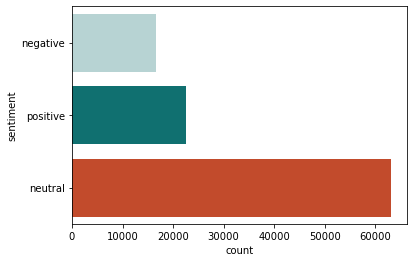

In [72]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=GoT_df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

In [99]:
print(GoT_df['sentiment'].value_counts()['positive'])
print(GoT_df['sentiment'].value_counts()['negative'])
print(GoT_df['sentiment'].value_counts()['neutral'])

22548
16717
63077


In [74]:
GoT_positive = GoT_df.loc[GoT_df['sentiment'] == 'positive']
GoT_negative = GoT_df.loc[GoT_df['sentiment'] == 'negative']

In [75]:
GoT_positive.head()

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,day_of_week,month,year,neg,neu,pos,compound,sentiment
1,10,shagil_,firstpost,mentions,2016-04-01 07:02:47+00:00,715796535875932160,rt @firstpost: 'heavy bubbles is secret of my ...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016,0.0,0.879,0.121,0.2960,positive
4,19,davidgmcneill,syidmassiah,mentions,2016-04-01 07:26:27+00:00,715802491762384900,rt @syidmassiah: awesome #gameofthrones https:...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016,0.0,0.494,0.506,0.6249,positive
5,22,simonmontefiore,timthelibrarian,mentions,2016-04-01 07:56:03+00:00,715809940833767424,rt @timthelibrarian: deliberate #gameofthrones...,"['gameofthrones', 'romanovs']",True,2016-04-01,1,13,Friday,4,2016,0.0,0.813,0.187,0.3182,positive
6,23,simonmontefiore,simonmontefiore,mentions,2016-04-01 07:56:03+00:00,715809940833767424,rt @timthelibrarian: deliberate #gameofthrones...,"['gameofthrones', 'romanovs']",True,2016-04-01,1,13,Friday,4,2016,0.0,0.813,0.187,0.3182,positive
9,39,gameofthrones1v,gameofthrones1v,tweet,2016-04-01 09:46:09+00:00,715837648443678722,#gameofthrones game of thrones: complete fifth...,"['gameofthrones', 'dvd', 'tv', 'series']",False,2016-04-01,1,13,Friday,4,2016,0.0,0.820,0.180,0.5106,positive


In [76]:
GoT_negative.head()

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,day_of_week,month,year,neg,neu,pos,compound,sentiment
0,9,harpersbazaarsg,harpersbazaarsg,tweet,2016-04-01 07:00:22+00:00,715795927672496129,this is just insane for a tv series: https://t...,"['got', 'gameofthrones']",False,2016-04-01,1,13,Friday,4,2016,0.231,0.769,0.000,-0.4019,negative
2,15,gameofthrones1v,gameofthrones1v,tweet,2016-04-01 07:16:24+00:00,715799962588692483,#gameofthrones game of thrones: season 3 (#dvd...,"['gameofthrones', 'dvd']",False,2016-04-01,1,13,Friday,4,2016,0.138,0.862,0.000,-0.3400,negative
3,18,jennieloveslife,jennieloveslife,tweet,2016-04-01 07:26:20+00:00,715802462389714944,why is everybody lying about jon snow?\n\nhttp...,['gameofthrones'],False,2016-04-01,1,13,Friday,4,2016,0.298,0.702,0.000,-0.5267,negative
8,26,anntzt,anntzt,tweet,2016-04-01 08:38:00+00:00,715820497909456898,video: new game of thrones season 6 teaser tra...,['gameofthrones'],False,2016-04-01,1,13,Friday,4,2016,0.167,0.833,0.000,-0.2500,negative
14,59,linadbg,linadbg,tweet,2016-04-01 11:48:22+00:00,715868405258199040,all men must die: top 5 brutal deaths from ‘ga...,['gameofthrones'],False,2016-04-01,1,13,Friday,4,2016,0.426,0.479,0.096,-0.8020,negative


In [77]:
GoT_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22548 entries, 1 to 102340
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      22548 non-null  int64              
 1   poster          22548 non-null  object             
 2   recipient       22548 non-null  object             
 3   relationship    22548 non-null  object             
 4   tweet date      22548 non-null  datetime64[ns, UTC]
 5   tweet id        22548 non-null  int64              
 6   tweet           22548 non-null  object             
 7   hashtags        22548 non-null  object             
 8   retweet status  22548 non-null  bool               
 9   date            22548 non-null  object             
 10  day             22548 non-null  int64              
 11  week            22548 non-null  int64              
 12  day_of_week     22548 non-null  object             
 13  month           22548 non-null

In [78]:

#hardhome_pos = GoT_positive.query("date == '2016-06-01'")
#hardhome_neg = GoT_negative.query("date == '2016-06-01'")

#print(hardhome_pos['sentiment'].value_counts()['positive'])
#print(hardhome_neg['sentiment'].value_counts()['negative'])

In [97]:
#Get counts to have a look

pos = GoT_positive.groupby('date', as_index=False).count()
neg = GoT_negative.groupby('date', as_index=False).count()
neu = GoT_negative.groupby('date', as_index=False).count()

z = GoT_df.groupby('date', as_index=False).count()

In [98]:
z.head(90)

,date,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,day,week,day_of_week,month,year,neg,neu,pos,compound,sentiment
0,2016-04-01,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111
1,2016-04-02,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
2,2016-04-03,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
3,2016-04-04,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
4,2016-04-05,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
5,2016-04-06,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
6,2016-04-07,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
7,2016-04-08,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141
8,2016-04-09,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
9,2016-04-10,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102


In [85]:
april = GoT_positive.query("month == 4")
may = GoT_positive.query("month == 5")
june = GoT_positive.query("month == 6")

In [88]:
april.head(30)

,Unnamed: 0,poster,recipient,relationship,tweet date,tweet id,tweet,hashtags,retweet status,date,day,week,day_of_week,month,year,neg,neu,pos,compound,sentiment
1,10,shagil_,firstpost,mentions,2016-04-01 07:02:47+00:00,715796535875932160,rt @firstpost: 'heavy bubbles is secret of my ...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016,0.00,0.879,0.121,0.2960,positive
4,19,davidgmcneill,syidmassiah,mentions,2016-04-01 07:26:27+00:00,715802491762384900,rt @syidmassiah: awesome #gameofthrones https:...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016,0.00,0.494,0.506,0.6249,positive
5,22,simonmontefiore,timthelibrarian,mentions,2016-04-01 07:56:03+00:00,715809940833767424,rt @timthelibrarian: deliberate #gameofthrones...,"['gameofthrones', 'romanovs']",True,2016-04-01,1,13,Friday,4,2016,0.00,0.813,0.187,0.3182,positive
6,23,simonmontefiore,simonmontefiore,mentions,2016-04-01 07:56:03+00:00,715809940833767424,rt @timthelibrarian: deliberate #gameofthrones...,"['gameofthrones', 'romanovs']",True,2016-04-01,1,13,Friday,4,2016,0.00,0.813,0.187,0.3182,positive
9,39,gameofthrones1v,gameofthrones1v,tweet,2016-04-01 09:46:09+00:00,715837648443678722,#gameofthrones game of thrones: complete fifth...,"['gameofthrones', 'dvd', 'tv', 'series']",False,2016-04-01,1,13,Friday,4,2016,0.00,0.820,0.180,0.5106,positive
11,51,tamiegonu,klairedelune13,mentions,2016-04-01 10:52:33+00:00,715854358525648896,rt @klairedelune13: rally the realm.\nseason 3...,"['gameofthrones', 'got50']",True,2016-04-01,1,13,Friday,4,2016,0.00,0.881,0.119,0.3182,positive
12,55,ed1aniia,lea00star,mentions,2016-04-01 11:40:25+00:00,715866404591837186,rt @lea00star: #gameofthrones star: season 6 ‘...,"['gameofthrones', 'gameofthrones']",True,2016-04-01,1,13,Friday,4,2016,0.00,0.826,0.174,0.2263,positive
19,73,sexy_winelover,sexy_winelover,tweet,2016-04-01 12:29:42+00:00,715878807148826625,#sexy news via #vanityfair ;) differentiating ...,"['sexy', 'vanityfair', 'gameofthrones']",False,2016-04-01,1,13,Friday,4,2016,0.00,0.899,0.101,0.2263,positive
22,83,io9,io9,tweet,2016-04-01 13:01:00+00:00,715886684022431744,statistical analysis has revealed #gameofthron...,['gameofthrones'],False,2016-04-01,1,13,Friday,4,2016,0.00,0.763,0.237,0.4215,positive
24,94,sophieturnersp,celebricity,mentions,2016-04-01 13:24:18+00:00,715892547688796160,rt @celebricity: .@sophiet - 18th huading awar...,['gameofthrones'],True,2016-04-01,1,13,Friday,4,2016,0.00,0.812,0.188,0.4588,positive


In [84]:
# Tidy up

NameError: name 'bla' is not defined